# Task 3 Find best results
From Quantum Open Source Foundation

For this problem you have the following situation: you are playing a game of tic-tac-toe, and you find the situation in the figure below, next is your turn, develop a quantum algorithm to be able to find the best decisions with higher probability.
<br />tic-tac-toe: [1,0,0,1, , ,0, , ]
<br />X | O | O 
<br />X |    | 
<br />O |    | 
<br />The following considerations apply:
<br />•	You are the X's.
<br />•	The matrix as a qubit and the state of the X's is |1> and of the O's is |0>, of the empty cells an unknown state.
<br />•	What are the valid combinations to win?
<br />•	You have at most 2 turns
<br />A hint for this exercise should consider all the possible ways to win that (there’s 8 of them), for this exercise must obtain with probability the state with the highest probability.
<br />for the output only give the status of the empty boxes, you consider this example: 
<br />If you think the solution is put the values 
<br />X | O | O 
<br />X | X  | X
<br />O | O | O

<br />The state output must be |1100>



# Thoughts

Considering all the possible ways to win the games and the current situation, I have two ways to win the game.
<br />That are 
<br />X|O|O 
<br />X|X|O
<br />O|O|X
<br /> and 
<br />X|O|O 
<br />X|X|X
<br />O|O|O
<br />The center place is important for both of them so I need to have a "1" at that place. 

<u> Using Qiskit to do the task.</u> 

In [1]:
#Import qiskit module

from qiskit import *

In [2]:
#Create a four qubits circuit with four classical bits.

circuit = QuantumCircuit(4,4)

In [3]:
#The center place should be my next step, I add a X gate on it.

circuit.x(0)

In [4]:
#And then following a Hadamard gate and CNOT gate 
circuit.h(1)
circuit.cx(1,3) 

In [5]:
#We can draw a circuit diagram by:
circuit.draw()

┌───┐     
q_0: ┤ X ├─────
     ├───┤     
q_1: ┤ H ├──■──
     └───┘  │  
q_2: ───────┼──
          ┌─┴─┐
q_3: ─────┤ X ├
          └───┘
c: 4/══════════

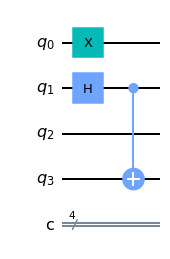

In [6]:
%matplotlib inline
circuit.draw(output='mpl')

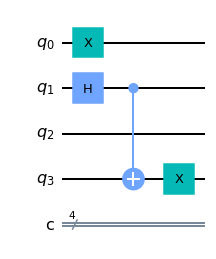

In [7]:
circuit.x(3)
circuit.draw(output='mpl')

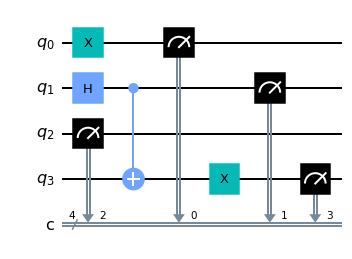

In [8]:
#Measure qubits and store in corresponding classical bits.
circuit.measure([0,1,2,3], [0,1,2,3])
circuit.draw(output='mpl')

In [9]:
#Simulate the quantum circuit first.
simulator = Aer.get_backend('qasm_simulator')

In [10]:
#Measure 1024 times.
results = execute(circuit, backend= simulator, shots=1024).result()

In [11]:
#We can get answer '1001' for 491 times and answer '0011' for 533 times.
counts= results.get_counts()
print(counts)

{'0011': 505, '1001': 519}


In [12]:
from qiskit.visualization import plot_histogram

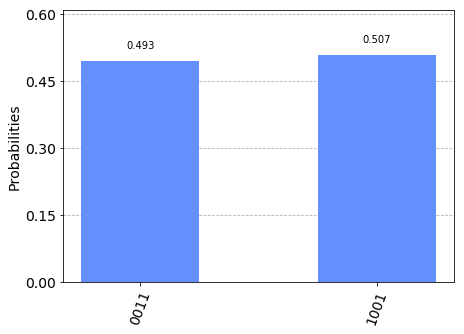

In [13]:
plot_histogram(results.get_counts(circuit))

In [14]:
#Prepare to run the circuit on a real quantum hardware IBM Q.  
provider = IBMQ.load_account()

In [15]:
#Designate specific backend
backend = provider.get_backend('ibmq_bogota')

In [16]:
#Add job watcher so that we can see current status of the job 
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [17]:
job = execute(circuit, backend= backend, shots=1024)

In [18]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


{'0000': 2, '0001': 31, '0010': 36, '0011': 495, '0101': 2, '0110': 5, '0111': 26, '1000': 18, '1001': 377, '1010': 2, '1011': 9, '1100': 1, '1101': 15, '1110': 3, '1111': 2}


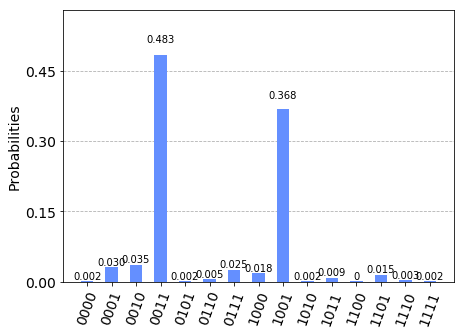

In [19]:
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts(circuit))

In [20]:
#Close the job watcher window by using
%qiskit_disable_job_watcher

# Result

# The measurement result is |1100> .